# Pasajeros Metrorrey

**Estadistica Aplicada**

**Alejandro Hernández Cerda 1903855**

**Sesion 16-28 de marzo 2023**

In [1]:
#importar las librerias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#librerias epscializadas 
from statsmodels.tsa.api import seasonal_decompose

In [3]:
#datos
metrorrey=pd.read_csv('metrorrey.csv')

In [4]:
metrorrey.head()

,Fecha,Pasajeros(miles),Ingresos(miles)
0,2008/01,5869.0,16979.0
1,2008/02,6499.0,18516.0
2,2008/03,5801.0,16719.0
3,2008/04,6932.0,17663.0
4,2008/05,6876.0,21079.0


**SIEMPRE QUE TRABAJEMOS CON SERIES DEBEMOS DECLARAR UNA VARIABLE COMO TIEMPO Y CONVERTIRLA EN EL INDEX**

In [5]:
#Convertir la variable o clumna  en 'datetime' tiempo
metrorrey['Fecha']=pd.to_datetime(metrorrey['Fecha'],format='%Y/%m')

In [6]:
#Convertir la variable fecha en index 
metrorrey=metrorrey.set_index('Fecha')

In [7]:
metrorrey.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Fecha', length=181, freq=None)

In [8]:
#darle formato mensual al index porque dice freq none
#Monthly Series 'MS'
metrorrey.index.freq='MS'

In [9]:
metrorrey.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
               '2022-08-01', '2022-09-01', '2022-10-01', '2022-11-01',
               '2022-12-01', '2023-01-01'],
              dtype='datetime64[ns]', name='Fecha', length=181, freq='MS')

**Si el dataframe ya tiene variable de fecha, este ya es el index y hay una frecuencia definida y hay un afrecuencia de tiempo, ya se pueden usar las herramientas de analisis de series de tiempo**


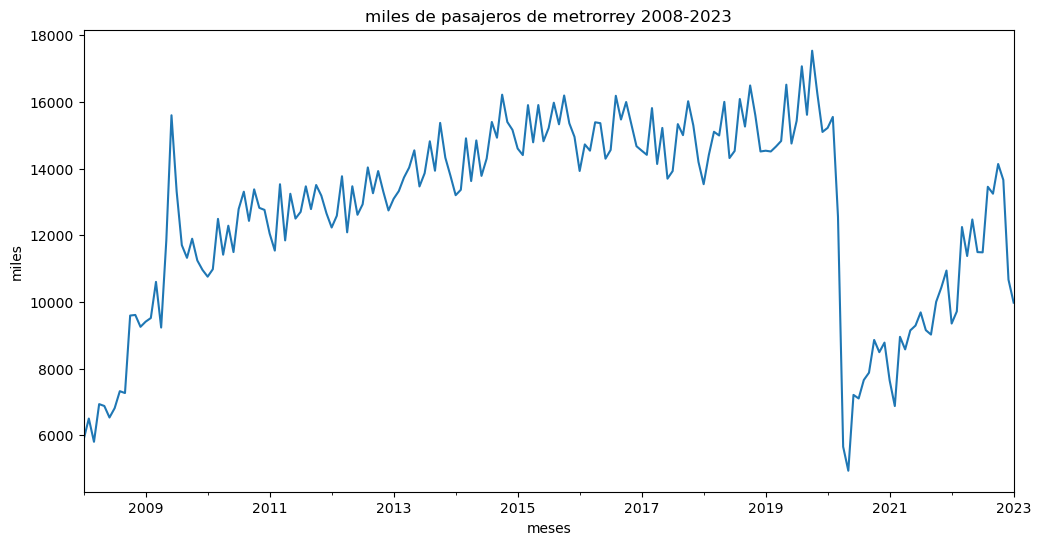

In [10]:
metrorrey['Pasajeros(miles)'].plot(figsize=(12,6))
plt.title('miles de pasajeros de metrorrey 2008-2023')
plt.ylabel('miles')
plt.xlabel('meses')
plt.show()

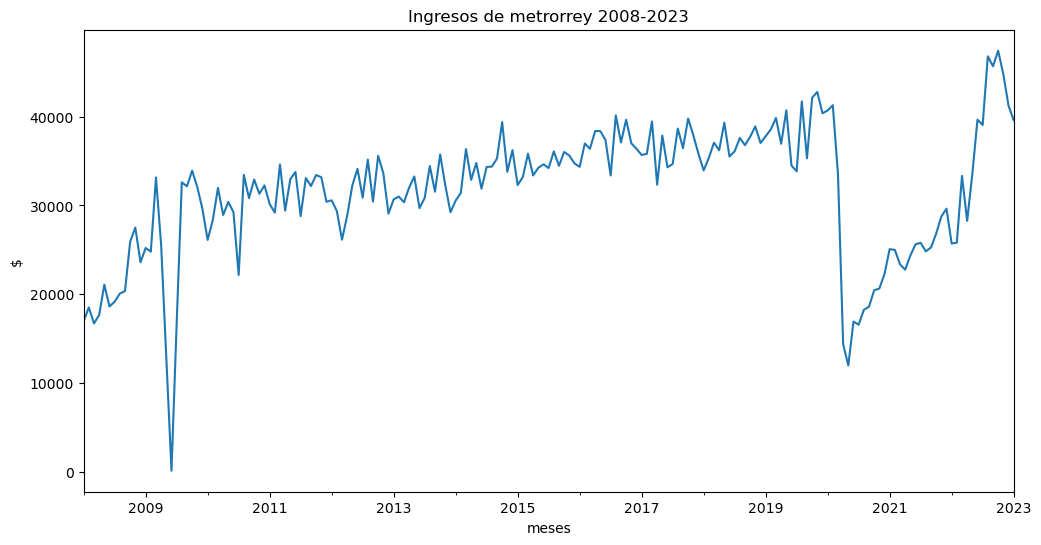

In [11]:
metrorrey['Ingresos(miles)'].plot(figsize=(12,6))
plt.title('Ingresos de metrorrey 2008-2023')
plt.ylabel('$')
plt.xlabel('meses')
plt.show()

## en el 2008 fue la crisis financiera 

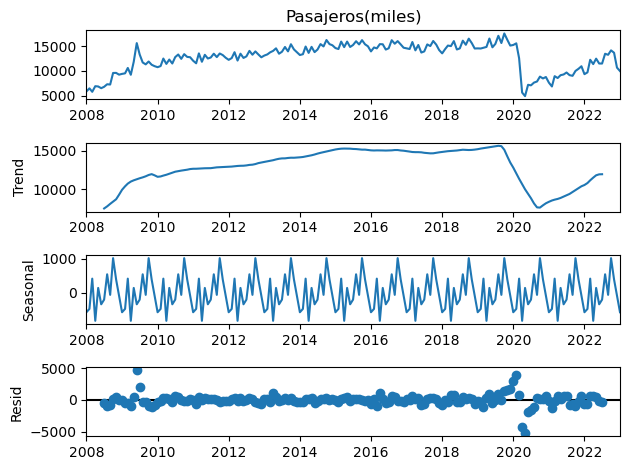

In [12]:
serie1=seasonal_decompose(metrorrey['Pasajeros(miles)'],model='ad')
serie1.plot()
plt.show()
# Trend es realidad la tendencia ciclo 

In [13]:
#vamos a ver el componente estacional 
serie1.seasonal.iloc[0:12]
#cuanod hay positivo hay mas pasajeros de lo normal 

Fecha
2008-01-01    -565.338211
2008-02-01    -467.710291
2008-03-01     417.269947
2008-04-01    -815.748883
2008-05-01     145.240614
2008-06-01    -332.910830
2008-07-01    -196.040026
2008-08-01     544.016519
2008-09-01     -56.829133
2008-10-01    1016.647513
2008-11-01     392.821051
2008-12-01     -81.418270
Freq: MS, Name: seasonal, dtype: float64

In [14]:
## los meses que hay mas pasajeros en metrorrey 
#marzo , mayo, agosto, octubre, noviembre
##los meses donde hay menos pasajeros 
#Enero,febrer,oabril,junio,julio,septiembre,diciembre

In [15]:
#desestacionalizar pasajeros de metrorrey 
metrorrey['pas_desestacionalizado']=metrorrey['Pasajeros(miles)']-serie1.seasonal

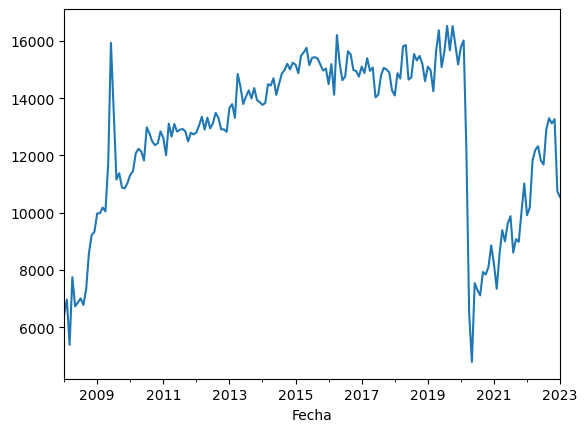

In [16]:
metrorrey['pas_desestacionalizado'].plot();